In [1]:
%load_ext autoreload
%autoreload 2

# Flujo de Trabajo de Workshop: Migración de Datos y Análisis Inicial

Este script de Python es el primer paso en nuestro flujo de trabajo, centrado en la migración y análisis inicial de datos con Pandas. Su función es cargar datos desde un archivo CSV para verificar su correcta importación, utilizando Pandas para leer el archivo y visualizar las primeras filas. Este proceso garantiza que los datos estén listos para las siguientes fases de análisis, marcando el inicio de nuestra exploración y manipulación de datos en el proyecto.


## Se importan bibliotecas para el uso de Python.

In [2]:
import pandas as pd
import psycopg2
from psycopg2 import sql
import configparser
import csv
import matplotlib.pyplot as plt

## Importación del CSV con Pandas

Este código realiza las siguientes operaciones:

- Importa el archivo CSV utilizando la biblioteca `pandas`.
- Verifica la correcta carga de los datos utilizando `datos.head()` para mostrar las primeras filas del DataFrame.

In [3]:
# Ruta al archivo CSV
ruta_archivo = r"C:\Users\cesar\Desktop\platzi\ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas
datos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(datos.head())

  First Name;Last Name;Email;Application Date;Country;YOE;Seniority;Technology;Code Challenge Score;Technical Interview Score
0  Bernadette;Langworth;leonard91@yahoo.com;2021-...                                                                         
1  Camryn;Reynolds;zelda56@hotmail.com;2021-09-09...                                                                         
2  Larue;Spinka;okey_schultz41@gmail.com;2020-04-...                                                                         
3  Arch;Spinka;elvera_kulas@yahoo.com;2020-10-01;...                                                                         
4  Larue;Altenwerth;minnie.gislason@gmail.com;202...                                                                         


## Importación del CSV con Pandas

Este código realiza las siguientes operaciones:

- Importa especificando `;` como delimitador.
- Verifica la correcta carga de los datos utilizando `datos.head()` para mostrar las primeras filas del DataFrame.

In [4]:
# Ruta al archivo CSV
ruta_archivo = r"C:\Users\cesar\Desktop\platzi\ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas y especificando el delimitador correcto
datos = pd.read_csv(ruta_archivo, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(datos.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

## Carga del CSV

- Define la ruta al archivo `candidates.csv`.
- Carga el archivo en un DataFrame con `pd.read_csv`, usando `;` como delimitador.

## Verificación de Datos

- Muestra las primeras filas con `datos.head()` para inspección inicial.

## Filtrado de Datos

- **Por País:** Filtra candidatos de `'Norway'`.
- **Por Puntuación:** Selecciona aquellos con puntuación técnica > 8.

## Resultados

- Imprime los DataFrames filtrados para visualizar los candidatos seleccionados.


In [5]:
# Ruta al archivo CSV
ruta_archivo = r"C:\Users\cesar\Desktop\platzi\ETL_Workshop_01\candidates.csv"

# Leer el archivo CSV utilizando pandas y especificando el delimitador correcto
datos = pd.read_csv(ruta_archivo, delimiter=';')

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print("Datos iniciales:")
print(datos.head())

# Filtrar candidatos de un país específico, por ejemplo, 'Norway'
candidatos_noruega = datos[datos['Country'] == 'Norway']

# Filtrar candidatos con una puntuación técnica superior a 8
candidatos_alta_puntuacion = datos[datos['Technical Interview Score'] > 8]

# Mostrar los resultados de los filtrados
print("\nCandidatos de Norway:")
print(candidatos_noruega)

print("\nCandidatos con puntuación técnica superior a 8:")
print(candidatos_alta_puntuacion)

Datos iniciales:
   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                        

# Creación de Tabla en Base de Datos con Python

1. **Lectura de Configuración:** Utiliza `configparser` para leer la configuración de conexión a la base de datos desde un archivo `db_config.ini`. Obtiene detalles cruciales como el nombre de la base de datos, usuario, contraseña, host y puerto.

2. **Inicialización de Variables:** Inicializa variables `cur` (cursor) y `conn` (conexión) para asegurar su disponibilidad a lo largo del proceso.

3. **Establecimiento de Conexión y Creación de Cursor:**
   - **Conexión:** Establece una conexión a la base de datos utilizando los parámetros obtenidos. La conexión es esencial para iniciar una sesión entre el programa de aplicación y la base de datos.
   - **Cursor:** Crea un cursor mediante el método `cursor()` del objeto de conexión. El cursor es utilizado para ejecutar comandos SQL y manejar los datos resultantes.

4. **Definición y Ejecución de Comando SQL:** Define y ejecuta un comando SQL para crear una tabla `candidates` si esta no existe, especificando varias columnas para almacenar detalles de los candidatos.

5. **Persistencia de Cambios:** Realiza un `commit` de los cambios a la base de datos para asegurar que la operación de creación de la tabla sea permanente.

6. **Manejo de Excepciones:** Captura y maneja excepciones específicas de `psycopg2` en caso de que surjan errores durante el proceso, imprimiendo el mensaje de error correspondiente.

7. **Cierre de Recursos:** En un bloque `finally`, cierra el cursor y la conexión para liberar recursos, asegurando que estos se cierren adecuadamente tanto si el proceso fue exitoso como si ocurrió un error.

## Conceptos Clave

- **Cursor:** En bases de datos, un cursor es una estructura que permite recorrer y manipular las filas devueltas por las consultas SQL de manera secuencial. Es fundamental para operaciones detalladas sobre los datos.

- **Conexión:** Representa una sesión entre un programa de aplicación y una base de datos. Es el canal a través del cual el programa envía consultas y recibe resultados de la base de datos, establecida con parámetros específicos de conexión.

In [6]:
# Leer la configuración de la base de datos desde db_config.ini
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

# Inicializar variables para asegurar su disponibilidad en el bloque finally
cur = None
conn = None

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )

    # Crear un cursor
    cur = conn.cursor()

    # Comando SQL para crear la tabla
    create_table_query = """
    CREATE TABLE IF NOT EXISTS candidates (
        FirstName varchar(255),
        LastName varchar(255),
        Email varchar(255),
        ApplicationDate date,
        Country varchar(255),
        YOE int,
        Seniority varchar(255),
        Technology varchar(255),
        CodeChallengeScore int,
        TechnicalInterviewScore int
    );
    """

    # Ejecutar el comando para crear la tabla
    cur.execute(create_table_query)

    # Commit los cambios a la base de datos
    conn.commit()

    print("Tabla creada exitosamente en PostgreSQL")

except psycopg2.Error as e:
    print(f"Ocurrió un error al crear la tabla: {e}")

finally:
    # Cerrar el cursor y la conexión
    if cur:
        cur.close()
    if conn:
        conn.close()


Tabla creada exitosamente en PostgreSQL


# Importar Datos desde CSV a PostgreSQL con Python

Este script es una guía paso a paso para importar datos de un archivo CSV a una tabla en una base de datos PostgreSQL. La operación se realiza en varias etapas clave, garantizando una transferencia de datos eficiente y organizada.

## Preparativos Iniciales

1. **Lectura de Configuración:** El proceso inicia con la lectura de parámetros de conexión desde un archivo `db_config.ini` utilizando `configparser`. Esto incluye información como el nombre de la base de datos, usuario, contraseña, host y puerto.

2. **Conexión a la Base de Datos:** Con estos parámetros, se establece una conexión a la base de datos PostgreSQL y se crea un cursor. Este cursor será esencial para ejecutar comandos SQL posteriormente.

## Importación de Datos

3. **Apertura del Archivo CSV:** El script localiza y abre el archivo CSV especificado en `csv_file_path`. Es importante ajustar la ruta al entorno actual y asegurarse de que el delimitador en `csv.reader` coincida con el del archivo.

4. **Lectura y Inserción de Datos:**
   - Se omite la primera línea del CSV (usualmente el encabezado) para evitar insertarla como un registro en la base de datos.
   - Se lee cada fila del archivo CSV y se inserta en la tabla `candidates` de la base de datos utilizando una instrucción SQL `INSERT`. Cada valor de la fila se pasa como un parámetro a la consulta, correspondiendo a las columnas de la tabla.

## Finalización y Limpieza

5. **Persistencia y Cierre:**
   - Se ejecuta un `commit` para hacer permanentes los cambios en la base de datos.
   - Se cierran el cursor y la conexión para liberar recursos y asegurar la integridad de la sesión con la base de datos.

In [7]:
# Leer la configuración de la base de datos desde db_config.ini
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

# Establecer conexión a la base de datos
conn = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)
cur = conn.cursor()

# Ruta al archivo CSV
csv_file_path = r'C:\Users\cesar\Desktop\platzi\ETL_Workshop_01\candidates.csv'  # Asegúrate de ajustar esta ruta a tu entorno

# Abrir el archivo CSV para insertar datos
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')  # Ajustar el delimitador a punto y coma
    next(reader)  # Saltar el encabezado del archivo CSV
    for row in reader:
        # Asegúrate de que la cantidad de placeholders (%s) coincida con el número de columnas de tu tabla
        cur.execute(
            "INSERT INTO candidates (FirstName, LastName, Email, ApplicationDate, Country, YOE, Seniority, Technology, CodeChallengeScore, TechnicalInterviewScore) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",
            row
        )

# Hacer commit de los cambios y cerrar la conexión
conn.commit()
cur.close()
conn.close()

print("Datos insertados exitosamente desde el CSV a la base de datos.")

Datos insertados exitosamente desde el CSV a la base de datos.


# Consulta Rápida en PostgreSQL con Python

Este script demuestra cómo realizar y procesar una consulta básica en PostgreSQL, extrayendo y visualizando los primeros 30 registros de la tabla `candidates`.

## Pasos Clave

1. **Configuración:** Lee los detalles de conexión de `db_config.ini` usando `configparser` y establece una conexión a la base de datos PostgreSQL con `psycopg2`.

2. **Consulta y Resultados:**
   - Ejecuta `SELECT * FROM candidates LIMIT 30` para obtener los primeros 30 registros.
   - Recupera y muestra los nombres de las columnas seguidos de cada registro, separando los valores con ` | ` para una visualización clara.

3. **Manejo de Excepciones y Cierre:**
   - Captura errores durante la consulta para manejo de fallos.
   - Cierra el cursor y la conexión al finalizar para liberar recursos.

In [8]:
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Ejecutar una consulta para seleccionar los primeros 30 registros
    cur.execute("SELECT * FROM candidates LIMIT 30")

    # Obtener y preparar los resultados de la consulta para la visualización
    rows = cur.fetchall()
    
    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cur.description]
    
    # Imprimir los nombres de las columnas
    print(' | '.join(column_names))
    print('-' * (len(column_names) * 20))  # Ajusta el multiplicador según sea necesario para la longitud
    
    # Imprimir cada fila
    for row in rows:
        # Convertir todos los valores a string y concatenarlos con ' | '
        print(' | '.join(str(value) for value in row))

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


firstname | lastname | email | applicationdate | country | yoe | seniority | technology | codechallengescore | technicalinterviewscore
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Bernadette | Langworth | leonard91@yahoo.com | 2021-02-26 | Norway | 2 | Intern | Data Engineer | 3 | 3
Camryn | Reynolds | zelda56@hotmail.com | 2021-09-09 | Panama | 10 | Intern | Data Engineer | 2 | 10
Larue | Spinka | okey_schultz41@gmail.com | 2020-04-14 | Belarus | 4 | Mid-Level | Client Success | 10 | 9
Arch | Spinka | elvera_kulas@yahoo.com | 2020-10-01 | Eritrea | 25 | Trainee | QA Manual | 7 | 1
Larue | Altenwerth | minnie.gislason@gmail.com | 2020-05-20 | Myanmar | 13 | Mid-Level | Social Media Community Management | 9 | 7
Alec | Abbott | juanita_hansen@gmail.com | 2019-08-17 | Zimbabwe | 8 | Junior | Adobe Experience Manager | 2 | 9
Allison | J

# 🧹✨ Inicio de la Limpieza de la Base de Datos


In [9]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Ejecutar una consulta para contar el número total de filas en la tabla 'candidates'
    cur.execute("SELECT COUNT(*) FROM candidates")

    # Obtener el resultado de la consulta
    row_count = cur.fetchone()[0]

    # Imprimir la cantidad de filas
    print(f"Total de filas en la tabla 'candidates': {row_count}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


Total de filas en la tabla 'candidates': 50000


In [10]:
import configparser
import psycopg2

# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    conn.autocommit = True
    cur = conn.cursor()

    # Paso 1: Contar el número total de filas en la tabla 'candidates'
    cur.execute("SELECT COUNT(*) FROM candidates")
    row_count_before = cur.fetchone()[0]
    print(f"Total de filas antes de la eliminación: {row_count_before}")

    # Paso 2: Identificar y eliminar filas duplicadas (excepto una)
    print("Eliminando filas duplicadas...")
    cur.execute("""
        DELETE FROM candidates
        WHERE ctid NOT IN (
            SELECT MIN(ctid)
            FROM candidates
            GROUP BY FirstName, LastName, Email, ApplicationDate, Country, YOE, Seniority, Technology, CodeChallengeScore, TechnicalInterviewScore
        )
    """)

    # Paso 3: Contar el número de filas después de eliminar duplicados
    cur.execute("SELECT COUNT(*) FROM candidates")
    row_count_after = cur.fetchone()[0]
    print(f"Total de filas después de la eliminación: {row_count_after}")

    # Paso 4: Mostrar mensaje de progreso
    rows_deleted = row_count_before - row_count_after
    print(f"Filas duplicadas eliminadas: {rows_deleted}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


Total de filas antes de la eliminación: 50000
Eliminando filas duplicadas...
Total de filas después de la eliminación: 50000
Filas duplicadas eliminadas: 0


In [19]:
import configparser
import psycopg2

# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Lista de columnas para las cuales queremos obtener valores únicos y contar los nulos
    columns = [ 'country', 'YOE', 'Seniority', 'Technology', 'CodeChallengeScore', 'TechnicalInterviewScore']

    # Iterar a través de cada columna y obtener sus valores únicos junto con sus recuentos
    for column in columns:
        print(f"\nValores únicos para {column} (incluyendo cantidad de repeticiones):")
        cur.execute(f"""
            SELECT {column}, COUNT(*)
            FROM candidates
            GROUP BY {column}
            ORDER BY {column}
        """)
        for value, count in cur.fetchall():
            print(f"{value}: {count} veces")

        # Contar los datos nulos para la columna actual
        # Modificamos la consulta para omitir la comparación con una cadena vacía para columnas numéricas
        cur.execute(f"SELECT COUNT(*) FROM candidates WHERE {column} IS NULL")
        blank_count = cur.fetchone()[0]
        print(f"Datos nulos para {column}: {blank_count}")

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()




Valores únicos para country (incluyendo cantidad de repeticiones):
Afghanistan: 197 veces
Albania: 200 veces
Algeria: 185 veces
American Samoa: 182 veces
Andorra: 192 veces
Angola: 229 veces
Anguilla: 190 veces
Antarctica (the territory South of 60 deg S): 185 veces
Antigua and Barbuda: 206 veces
Argentina: 221 veces
Armenia: 175 veces
Aruba: 203 veces
Australia: 208 veces
Austria: 187 veces
Azerbaijan: 194 veces
Bahamas: 198 veces
Bahrain: 186 veces
Bangladesh: 204 veces
Barbados: 197 veces
Belarus: 213 veces
Belgium: 193 veces
Belize: 198 veces
Benin: 181 veces
Bermuda: 206 veces
Bhutan: 210 veces
Bolivia: 215 veces
Bosnia and Herzegovina: 203 veces
Botswana: 203 veces
Bouvet Island (Bouvetoya): 224 veces
Brazil: 204 veces
British Indian Ocean Territory (Chagos Archipelago): 218 veces
Brunei Darussalam: 194 veces
Bulgaria: 204 veces
Burkina Faso: 182 veces
Burundi: 211 veces
Cambodia: 226 veces
Cameroon: 196 veces
Canada: 207 veces
Cape Verde: 172 veces
Cayman Islands: 207 veces
Cen

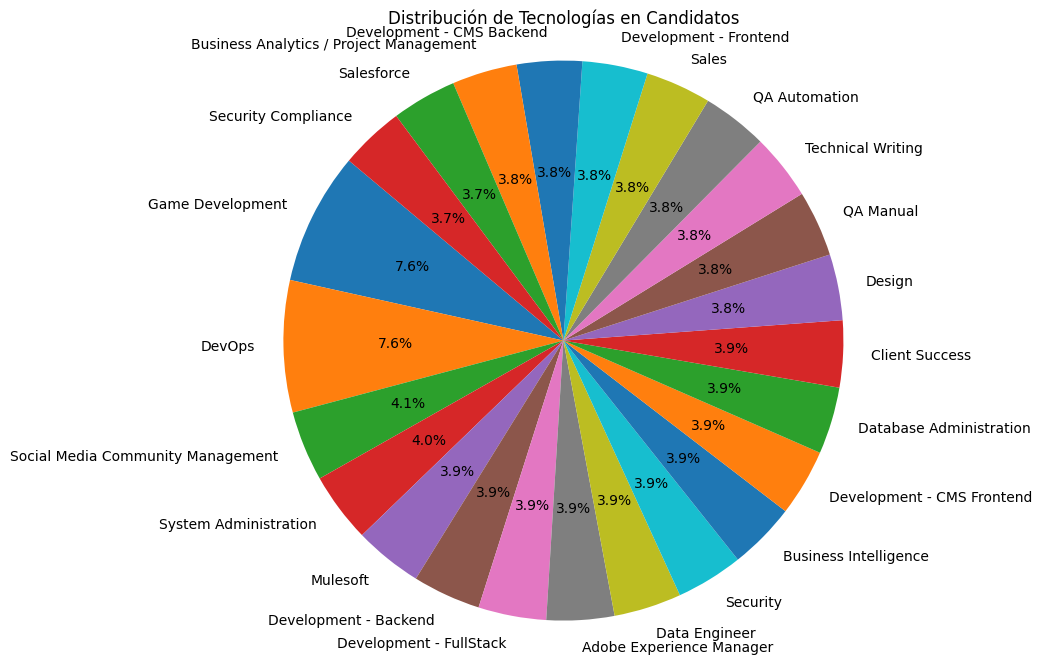

In [12]:
# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

technologies = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer los datos de la columna 'Technology' y contarlos
    cur.execute("""
        SELECT Technology, COUNT(*)
        FROM candidates
        GROUP BY Technology
        ORDER BY COUNT(*) DESC
    """)
    
    for tech, count in cur.fetchall():
        technologies.append(tech if tech is not None else 'No especificado')
        counts.append(count)

    # Generar el gráfico de torta
    plt.figure(figsize=(10, 8))
    plt.pie(counts, labels=technologies, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de Tecnologías en Candidatos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()

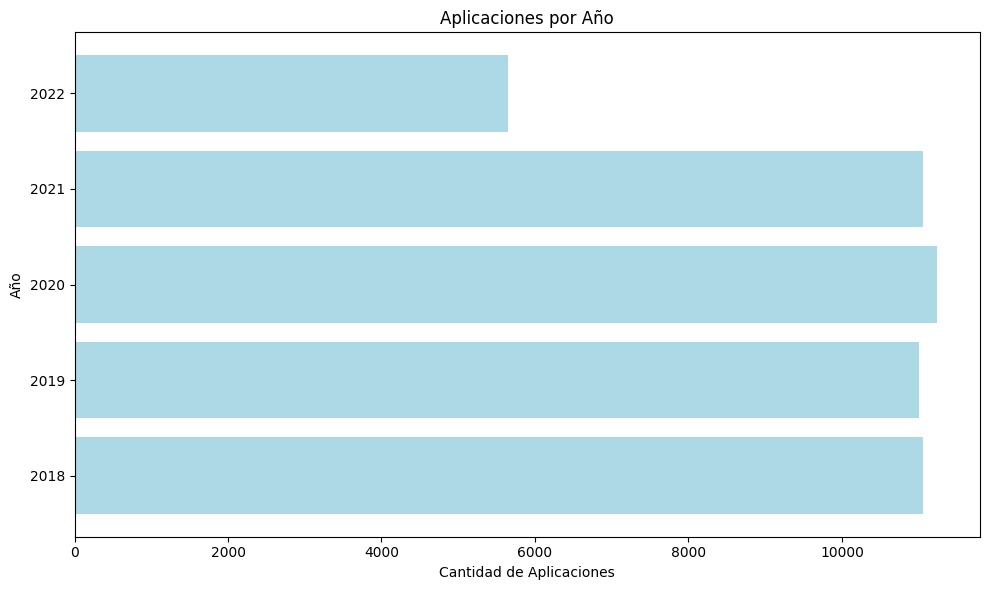

In [14]:
import configparser
import psycopg2
import matplotlib.pyplot as plt

# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

years = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer el año de la columna 'ApplicationDate' y contar las ocurrencias por año
    cur.execute("""
        SELECT EXTRACT(YEAR FROM ApplicationDate) AS Year, COUNT(*)
        FROM candidates
        GROUP BY Year
        ORDER BY Year
    """)
    
    for year, count in cur.fetchall():
        years.append(str(int(year)))  # Convertir año a string para mejor visualización en el eje
        counts.append(count)

    # Generar el gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    plt.barh(years, counts, color='lightblue')
    plt.xlabel('Cantidad de Aplicaciones')
    plt.ylabel('Año')
    plt.title('Aplicaciones por Año')
    plt.tight_layout()  # Ajustar automáticamente los subplots para que encajen en el área de la figura
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()



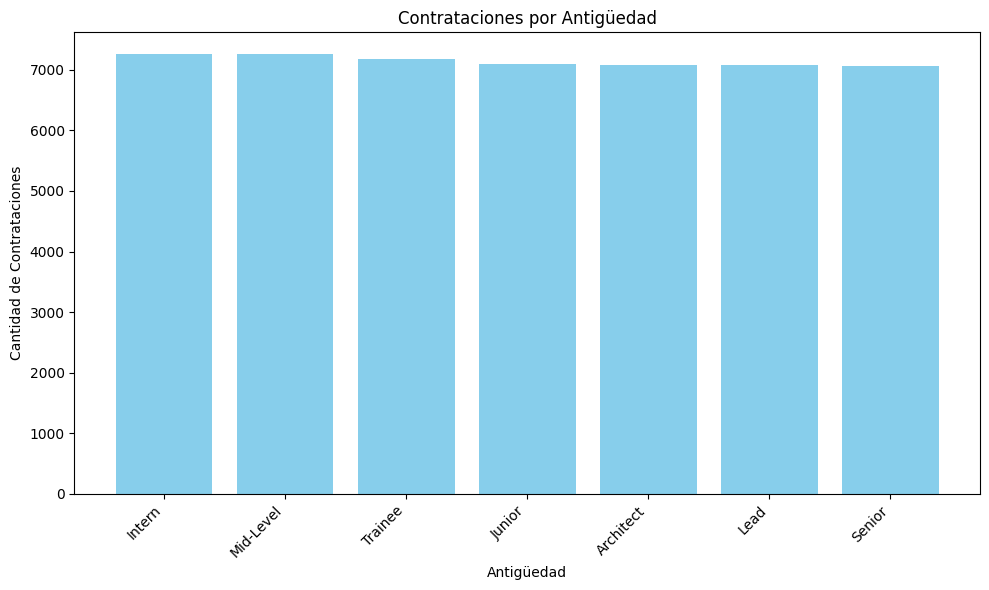

In [16]:
import configparser
import psycopg2
import matplotlib.pyplot as plt

# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

seniorities = []
counts = []

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer las contrataciones por antigüedad
    cur.execute("""
        SELECT Seniority, COUNT(*)
        FROM candidates
        GROUP BY Seniority
        ORDER BY COUNT(*) DESC
    """)
    
    for seniority, count in cur.fetchall():
        seniorities.append(seniority if seniority is not None else 'No especificado')
        counts.append(count)

    # Generar el gráfico de barras verticales
    plt.figure(figsize=(10, 6))
    plt.bar(seniorities, counts, color='skyblue')
    plt.xlabel('Antigüedad')
    plt.ylabel('Cantidad de Contrataciones')
    plt.title('Contrataciones por Antigüedad')
    plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas para mejor visualización
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()


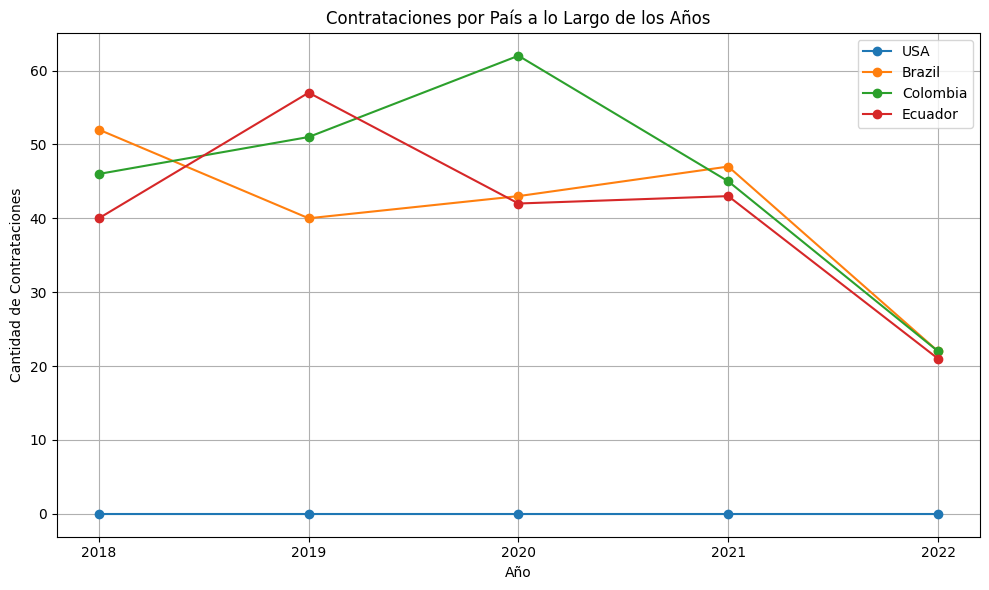

In [20]:
import configparser
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

# Leer el archivo de configuración para obtener los detalles de conexión
config = configparser.ConfigParser()
config.read('db_config.ini')

dbname = config.get('postgresql', 'dbname')
user = config.get('postgresql', 'user')
password = config.get('postgresql', 'password')
host = config.get('postgresql', 'host')
port = config.get('postgresql', 'port')

countries = ['USA', 'Brazil', 'Colombia', 'Ecuador']
data = {country: {} for country in countries}

try:
    # Establecer conexión a la base de datos
    conn = psycopg2.connect(
        dbname=dbname,
        user=user,
        password=password,
        host=host,
        port=port
    )
    cur = conn.cursor()

    # Extraer las contrataciones por país a lo largo de los años
    for country in countries:
        cur.execute(f"""
            SELECT EXTRACT(YEAR FROM ApplicationDate) AS Year, COUNT(*)
            FROM candidates
            WHERE Country = %s
            GROUP BY Year
            ORDER BY Year
        """, (country,))
        
        for year, count in cur.fetchall():
            # Asegurarse de que el año sea un entero para evitar problemas de tipo
            data[country][int(year)] = count

    # Preparar datos para el gráfico
    all_years = set()
    for country_data in data.values():
        all_years.update(country_data.keys())
    all_years = sorted(all_years)

    # Generar el gráfico de líneas múltiples
    plt.figure(figsize=(10, 6))
    for country, yearly_data in data.items():
        counts = [yearly_data.get(year, 0) for year in all_years]  # Usar 0 para años sin datos
        plt.plot(all_years, counts, marker='o', label=country)

    plt.xlabel('Año')
    plt.ylabel('Cantidad de Contrataciones')
    plt.title('Contrataciones por País a lo Largo de los Años')
    plt.legend()
    plt.grid(True)
    plt.xticks(all_years)  # Usar all_years directamente asegura compatibilidad de tipos
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print(f"Error al consultar la base de datos: {e}")
finally:
    if cur:
        cur.close()
    if conn:
        conn.close()
